In [ ]:
import json
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

In [5]:
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def extract_plot(data, gt=None, plotting=False):
    pos_expmts=[]
    pos_all=[]
    
    orientation_expmts=[]
    orientation_all=[]
    
    for idx in range(len(data)):
        x=data[idx]["odom"]["pose"]["pose"]['position']['x']
        y=data[idx]["odom"]["pose"]["pose"]['position']['y']
        z=data[idx]["odom"]["pose"]["pose"]['position']['z']
        pos_all.append([x,y,z])
        
        o_x=data[idx]["odom"]["pose"]["pose"]['orientation']['x']
        o_y=data[idx]["odom"]["pose"]["pose"]['orientation']['y']
        o_z=data[idx]["odom"]["pose"]["pose"]['orientation']['z']
        o_w=data[idx]["odom"]["pose"]["pose"]['orientation']['w']
        orientation_all.append([o_x,o_y,o_z,o_w])

        if data[idx]["expmt_flag"]:
            pos_expmts.append([x,y,z])
            orientation_expmts.append([o_x,o_y,o_z,o_w])

    return pos_expmts, pos_all, orientation_expmts, orientation_all

In [6]:
pos_expmts, pos_all, orientation_expmts, orientation_all=extract_plot(load_json("experiments/northeastpartial0/northeastpartial0.json"), plotting=False)

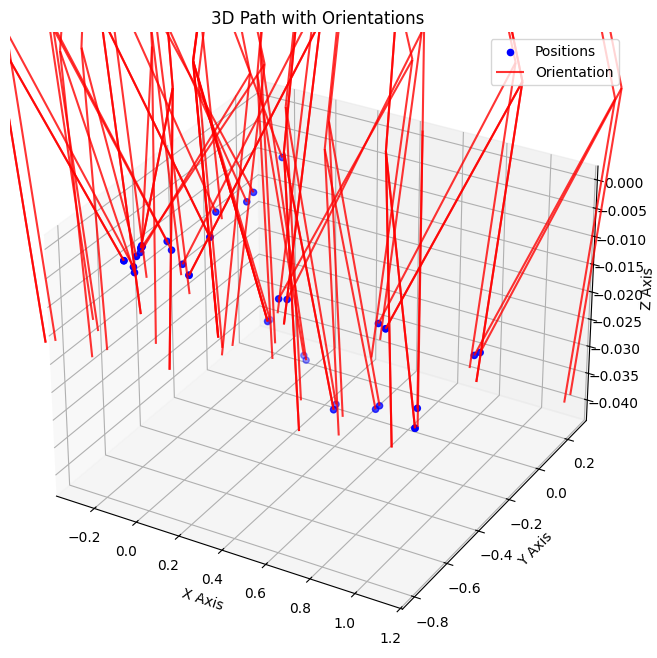

In [8]:
def plot_poses(pos_all, orientation_all):
    # Convert inputs to numpy arrays for easy slicing
    pos = np.array(pos_all)
    orient = np.array(orientation_all)
    
    # 1. Extract Positions
    x, y, z = pos[:, 0], pos[:, 1], pos[:, 2]
    
    # 2. Convert Quaternions to Direction Vectors
    # We create a Rotation object from the [x, y, z, w] quaternions
    rotations = R.from_quat(orient)
    
    # We apply the rotation to a unit vector [1, 0, 0] 
    # This represents the "Forward" direction (X-axis) of each point
    direction = rotations.apply([1, 0, 0])
    u, v, w = direction[:, 0], direction[:, 1], direction[:, 2]

    # 3. Plotting
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(x, y, z, color='blue', label='Positions', s=20)

    # Plot the orientations as arrows (quiver)
    # length: adjusts the size of the arrows
    # normalize: ensures all arrows have the same length
    ax.quiver(x, y, z, u, v, w, length=0.5, normalize=True, color='red', alpha=0.8, label='Orientation')

    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.set_title('3D Path with Orientations')
    ax.legend()
    
    plt.show()

# Example usage:
# pos_all = [[0,0,0], [1,1,1], [2,0,1]]
# orientation_all = [[0,0,0,1], [0,0.707,0,0.707], [0,1,0,0]]
plot_poses(pos_all, orientation_all)